#Analysis Project for Shaker Group Company "Full Data from April To May "

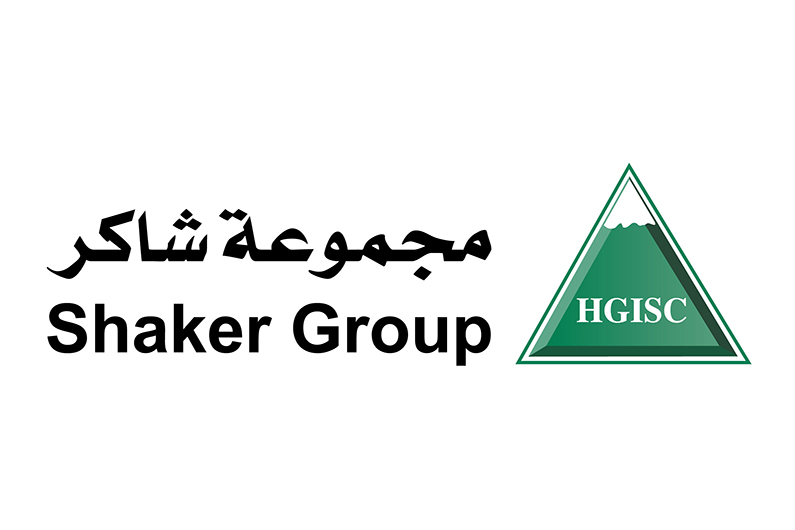

# Import

In [19]:
from sqlalchemy import create_engine
import pandas as pd
import datetime
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno

# Reading Data

In [2]:
df = pd.read_csv('Full.csv')

# Exploratory data analysis

In [3]:
df.shape

(4306, 10)

In [4]:
df.head()

,Created on,City,Street,Change date for order master,Region Name,Brand Description,User Status Desc,Source Description,Complaint Type ID Description,Subtype ID description
0,4/1/2022,TAIF,TAIF-DUMMY,4/17/2022,Western Region,ARISTON,Closed,NaN,NaN,NaN
1,4/3/2022,RIYADH,TUWAIQ,4/17/2022,Central Region,MAYTAG,Closed,INBOUND,REPAIR,NO APPOINTMENT
2,4/3/2022,KHAMIS,ALMOSA,5/17/2022,Southern Region,MIDEA,Closed,INBOUND,REPAIR,NO APPOINTMENT
3,4/3/2022,RIYADH,AL - RAWDHAH,4/18/2022,Central Region,ARISTON,Closed,INBOUND,REPAIR,NO APPOINTMENT
4,4/3/2022,RIYADH,AL - NASEEM,4/14/2022,Central Region,ARISTON,Closed,INBOUND,REPAIR,NO APPOINTMENT


In [5]:
df.dtypes

Created on                       object
City                             object
Street                           object
Change date for order master     object
Region Name                      object
Brand Description                object
User Status Desc                 object
Source Description               object
Complaint Type ID Description    object
Subtype ID description           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Created on                     4306 non-null   object
 1   City                           4306 non-null   object
 2   Street                         4306 non-null   object
 3   Change date for order master   4306 non-null   object
 4   Region Name                    4306 non-null   object
 5   Brand Description              4306 non-null   object
 6   User Status Desc               4306 non-null   object
 7   Source Description             4220 non-null   object
 8   Complaint Type ID Description  4241 non-null   object
 9   Subtype ID description         4241 non-null   object
dtypes: object(10)
memory usage: 336.5+ KB


In [7]:
df.isnull().sum()

Created on                        0
City                              0
Street                            0
Change date for order master      0
Region Name                       0
Brand Description                 0
User Status Desc                  0
Source Description               86
Complaint Type ID Description    65
Subtype ID description           65
dtype: int64

In [8]:
df.drop_duplicates()

,Created on,City,Street,Change date for order master,Region Name,Brand Description,User Status Desc,Source Description,Complaint Type ID Description,Subtype ID description
0,4/1/2022,TAIF,TAIF-DUMMY,4/17/2022,Western Region,ARISTON,Closed,NaN,NaN,NaN
1,4/3/2022,RIYADH,TUWAIQ,4/17/2022,Central Region,MAYTAG,Closed,INBOUND,REPAIR,NO APPOINTMENT
2,4/3/2022,KHAMIS,ALMOSA,5/17/2022,Southern Region,MIDEA,Closed,INBOUND,REPAIR,NO APPOINTMENT
3,4/3/2022,RIYADH,AL - RAWDHAH,4/18/2022,Central Region,ARISTON,Closed,INBOUND,REPAIR,NO APPOINTMENT
4,4/3/2022,RIYADH,AL - NASEEM,4/14/2022,Central Region,ARISTON,Closed,INBOUND,REPAIR,NO APPOINTMENT
...,...,...,...,...,...,...,...,...,...,...
4301,5/31/2022,QASSIM,UNIZAH,6/7/2022,Northern Region,ARISTON,Closed,INBOUND,REPAIR,TECHNICIAN DID NOT ATTEND
4302,5/31/2022,JIZAN,SAMTA,6/8/2022,Southern Region,LG,Closed,INBOUND,REPAIR,TECHNICIAN DID NOT ATTEND
4303,5/31/2022,JEDDAH,HAMDANIA,6/7/2022,Western Region,BOMPANI,Closed,INBOUND,REPAIR,TECHNICIAN DID NOT ATTEND
4304,5/31/2022,QASSIM,MUNZEB,6/8/2022,Northern Region,LG,Closed,NaN,REPAIR,TECHNICIAN DID NOT ATTEND


In [12]:
df.describe().T

,count,unique,top,freq
Created on,4306,50,4/13/2022,168
City,4306,22,RIYADH,2189
Street,4306,508,ALMOSA,146
Change date for order master,4306,59,6/5/2022,318
Region Name,4306,5,Central Region,2281
Brand Description,4306,8,ARISTON,1321
User Status Desc,4306,17,Closed,2990
Source Description,4220,8,INBOUND,3621
Complaint Type ID Description,4241,7,REPAIR,3638
Subtype ID description,4241,38,NO APPOINTMENT,2394


In [29]:
df.describe()

,Created on,City,Street,Change date for order master,Region Name,Brand Description,User Status Desc,Source Description,Complaint Type ID Description,Subtype ID description
count,4306,4306,4306,4306,4306,4306,4306,4306,4306,4306
unique,50,22,508,59,5,8,17,9,8,39
top,4/13/2022,RIYADH,ALMOSA,6/5/2022,Central Region,ARISTON,Closed,INBOUND,REPAIR,NO APPOINTMENT
freq,168,2189,146,318,2281,1321,2990,3621,3638,2394


In [13]:
df.isna()

,Created on,City,Street,Change date for order master,Region Name,Brand Description,User Status Desc,Source Description,Complaint Type ID Description,Subtype ID description
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4301,False,False,False,False,False,False,False,False,False,False
4302,False,False,False,False,False,False,False,False,False,False
4303,False,False,False,False,False,False,False,False,False,False
4304,False,False,False,False,False,False,False,True,False,False


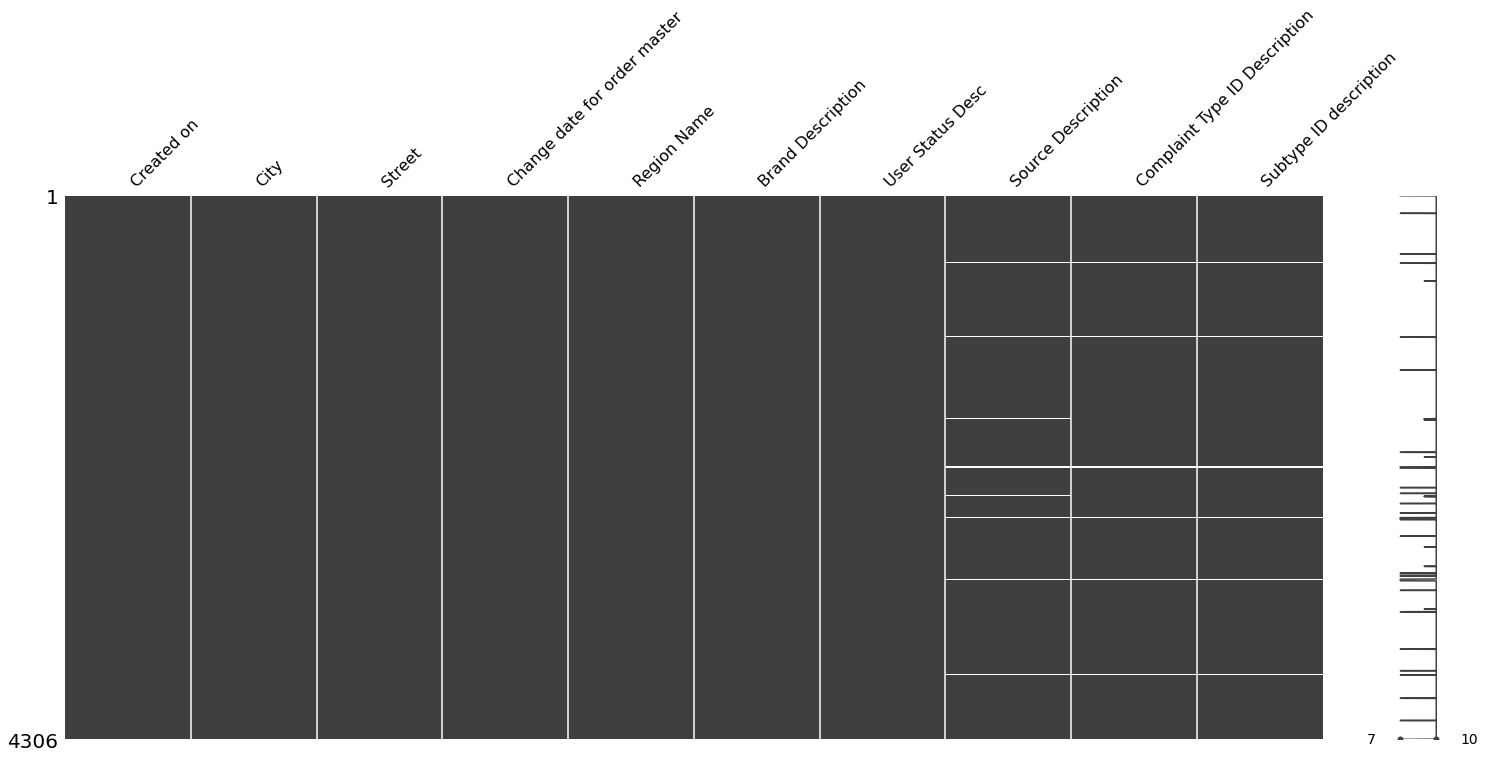

In [22]:
msno.matrix(df)

In [23]:
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

Source Description's null rate :2.0%
Complaint Type ID Description's null rate :1.51%
Subtype ID description's null rate :1.51%


In [24]:
df['City'].value_counts()

RIYADH         2189
KHAMIS          346
JEDDAH          344
QASSIM          313
AL KHOBAR       280
JIZAN           112
MAKKAH          104
AL KHARJ         92
TABUK            73
MADINA           72
AL BAHA          68
NIJRAN           53
TAIF             46
BISHA            43
YANBU            38
ARAR             34
HAIL             32
HAFIR BATIN      22
AL HASA          18
SAKAKA           12
JUBAIL           12
GURAIYAT          3
Name: City, dtype: int64

In [25]:
df['City'].replace(to_replace='HIstorical Productivity', value= 'Historical Productivity', inplace=True)

In [27]:
df=df.fillna(0)


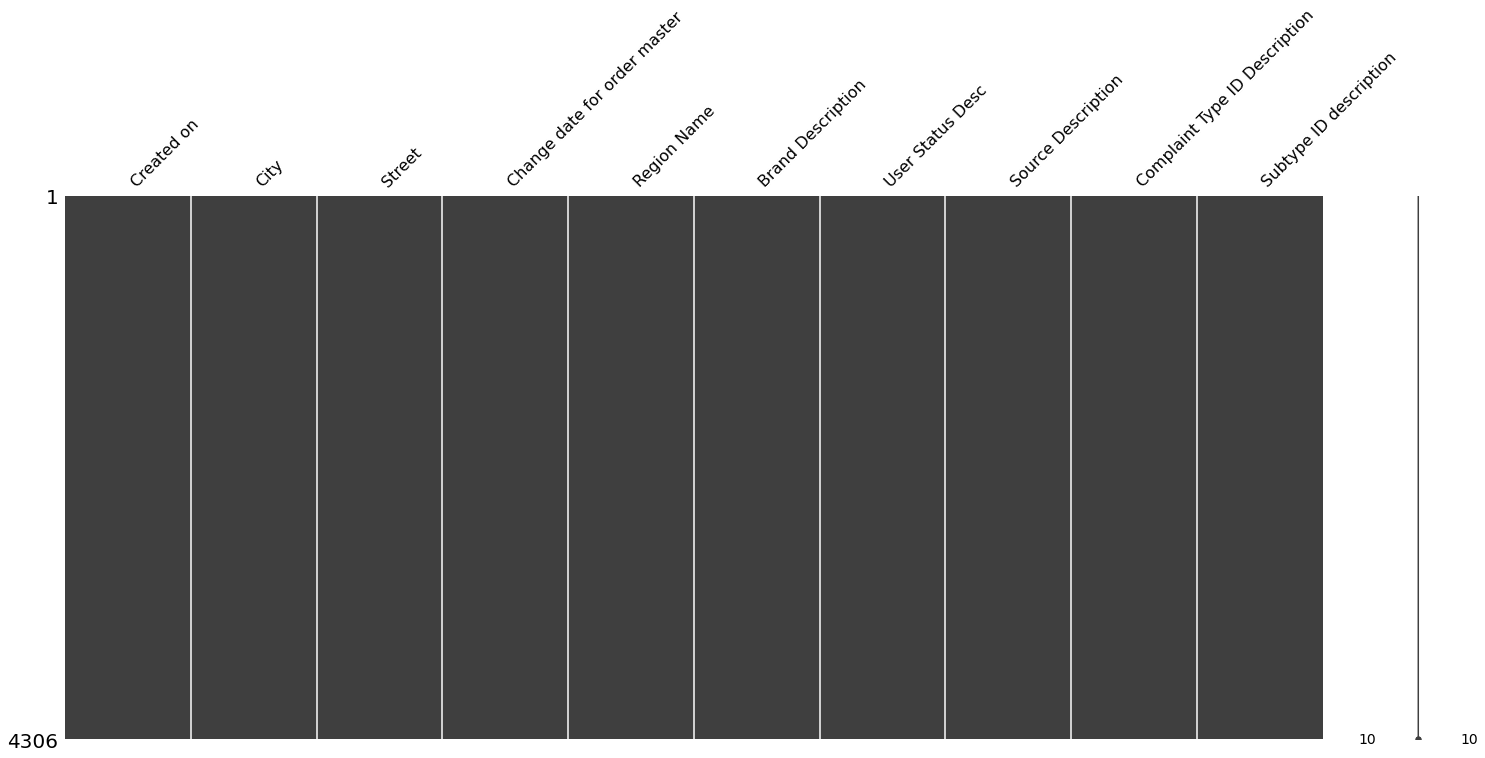

In [28]:
msno.matrix(df)

Text(0.5, 1.0, 'Counts of Region')

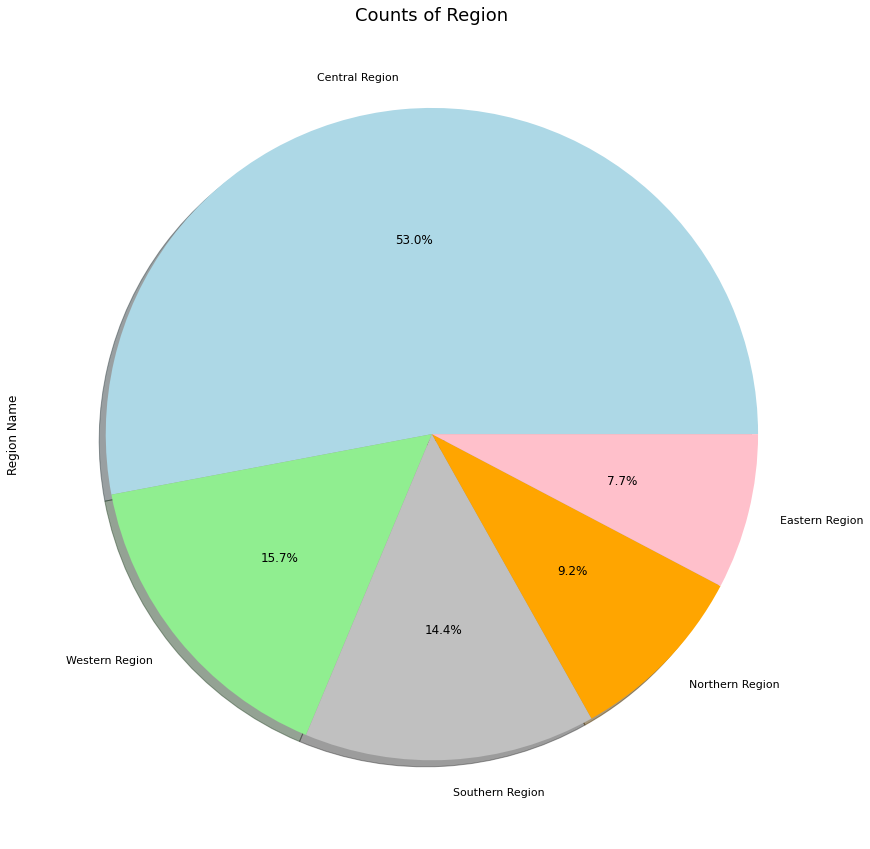

In [56]:
my_colors=['lightblue','lightgreen',
           'silver','orange','pink']
plt.figure(figsize=(15,15))
df["Region Name"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors = my_colors)
plt.title("Counts of Region", fontsize=18)

Text(0.5, 1.0, 'Relation btween City and Brand')

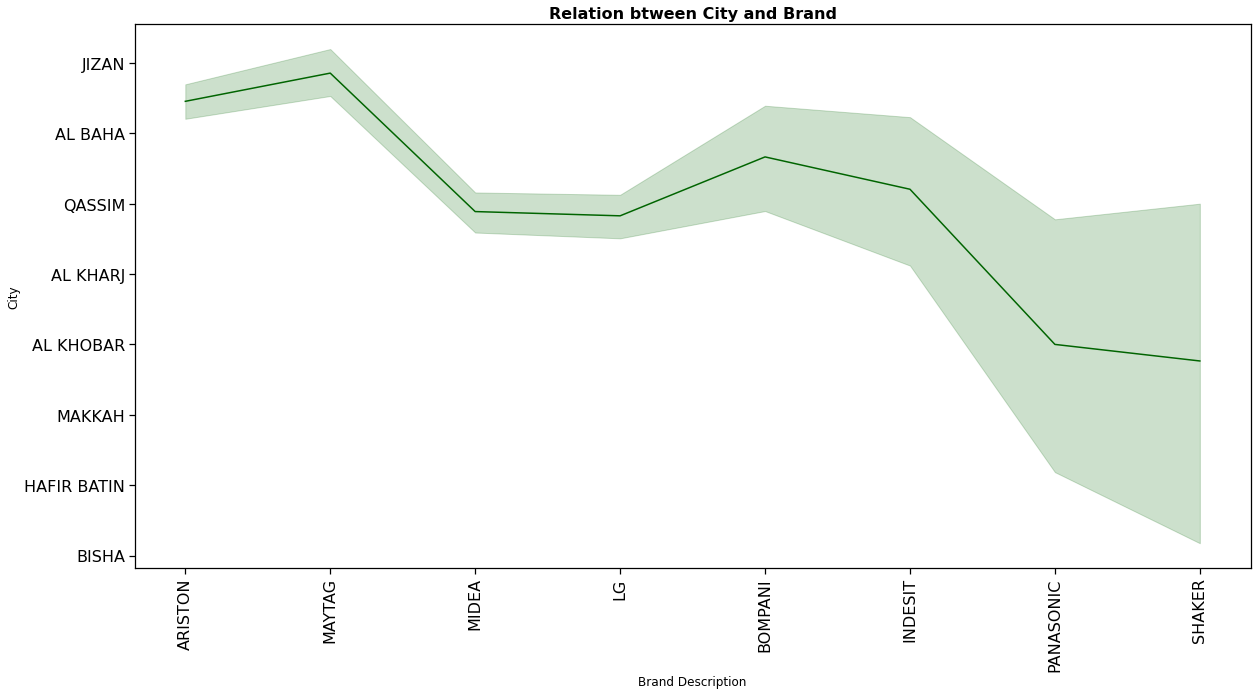

In [57]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, y="City",x='Brand Description', color='darkgreen')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Relation btween City and Brand', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'Count of Different Brand')

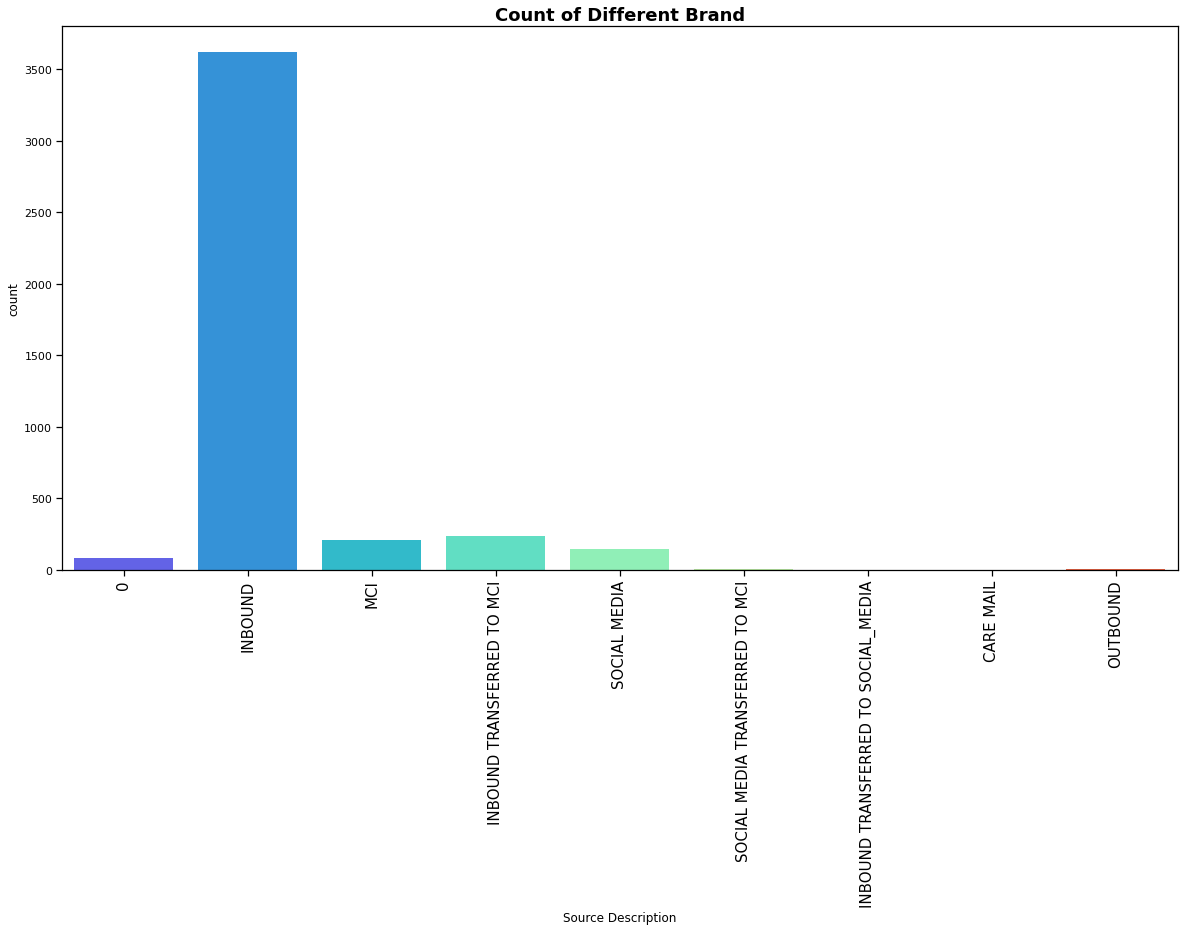

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="Source Description", palette='rainbow')
plt.xticks(fontsize=15, rotation = 90)

plt.title('Count of Different Brand', fontsize=18, fontweight='bold')